In [ ]:
# import necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.model_selection import cross_validate

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer()

def tokenize(text):
  return tokenizer.tokenize(text)

In [ ]:
text = pd.read_csv('/content/sent_contra_added.csv') # download dataset

In [ ]:
text.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,is_sarcastic,text,cleaned,pos_tags,lemmatized,characters count,...,emojis,emoticons,intensifiers,adjectives,adverbs,interjections,particles,contradition,sentiment,contradiction
0,0,0,0,0,1,графіки виживання тритонів і піраміди смертнос...,графіки виживаня тритонів і піраміди смертност...,NOUN NOUN NOUN CCONJ NOUN NOUN NOUN ADJ DET ADJ,графік виживаня тритон і піраміда смертність б...,83,...,0.000000,0.0,0.000000,0.200000,0.0,0.0,0.000000,1,0.000000,1
1,1,1,1,1,1,@lovemyself_not оні ти мене заблокуєш я люблю ...,оні ти мене заблокуєш я люблю каєбед вони мій ...,PRON PRON PRON VERB PRON VERB NOUN PRON DET NO...,оні ти я заблокувати я любити каєбед вони мій ...,74,...,0.090909,0.0,0.000000,0.000000,0.0,0.0,0.000000,0,0.000000,1
2,2,2,2,2,1,@k1207h03 я броньована бля😎,я броньована бля 😎,PRON ADJ NOUN PUNCT,я броньований бля 😎,27,...,0.333333,0.0,0.000000,0.333333,0.0,0.0,0.000000,0,0.500000,0
3,3,3,3,3,1,"мене не добавляють у різні списочки по типу ""г...",мене не добавляють у різні списочки по типу гі...,PRON PART VERB ADP ADJ NOUN ADP NOUN NOUN PRON...,я не добавляти у різний списочка по тип гівнож...,66,...,0.000000,0.0,0.166667,0.083333,0.0,0.0,0.166667,0,0.000000,0
4,4,4,4,4,1,@sorixben можу стати 😇,можу стати 😇,VERB VERB PUNCT,могти стати 😇,22,...,0.500000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0,0.333333,0


In [ ]:
def perform_cross_validation(algorithm, X, y, cv=5):
      """Performs cross-validation in 5-folds
      Args: 
        algorithm: a class of algorithm used for training.

        X: matrix of features.

        y: class label.

        cv: number of validation, by default equals to 5
       
       Returns:
        a dictionary with value for every performance measurement metric for 
        training and validation sets.
      """
      performance_measurements = cross_validate(estimator=algorithm,
                               X=X,
                               y=y,
                               cv=cv,
                               scoring=['accuracy', 'precision', 'recall', 'f1'],
                               return_train_score=True)
      
      return {"Training Accuracy scores": performance_measurements['train_accuracy'],
              "Mean Training Accuracy": performance_measurements['train_accuracy'].mean()*100,
              "Training Precision scores": performance_measurements['train_precision'],
              "Mean Training Precision": performance_measurements['train_precision'].mean()*100,
              "Training Recall scores": performance_measurements['train_recall'],
              "Mean Training Recall": performance_measurements['train_recall'].mean()*100,
              "Training F1 scores": performance_measurements['train_f1'],
              "Mean Training F1 Score": performance_measurements['train_f1'].mean()*100,
              "Validation Accuracy scores": performance_measurements['test_accuracy'],
              "Mean Validation Accuracy": performance_measurements['test_accuracy'].mean()*100,
              "Validation Precision scores": performance_measurements['test_precision'],
              "Mean Validation Precision": performance_measurements['test_precision'].mean()*100,
              "Validation Recall scores": performance_measurements['test_recall'],
              "Mean Validation Recall": performance_measurements['test_recall'].mean()*100,
              "Validation F1 scores": performance_measurements['test_f1'],
              "Mean Validation F1 Score": performance_measurements['test_f1'].mean() *100
              }

In [ ]:
def plot_performance(x_label, y_label, plot_title, training_data, validation_data):
        '''Plots performance on each fold for training and validation accuracy.

        Parameters:

         x_label: algorithm name
          
         y_label: metric name

         plot_title: title name
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, training_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, validation_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
# prepfare data with all features

text.sample(frac=1)

vectorizer            =  TfidfVectorizer(tokenizer=tokenize)

train_tf_idf_features =  vectorizer.fit_transform(text['lemmatized']).toarray()

train_tf_idf          = pd.DataFrame(train_tf_idf_features)

train_Y               = text['is_sarcastic']

features = ['characters count', 'words count',
       'sentences count', 'capital characters count', 'stopwords count',
       'unique words count', 'exclamation marks', 'question marks',
       'full stops', 'elipsis', 'average length of word',
       'average length of sentence', 'ratio of unique words',
       'ratio of stop words', 'quoted words', 'elongated words', 'emojis',
       'emoticons', 'intensifiers', 'adjectives', 'adverbs', 'interjections',
       'particles', 'contradiction', 'sentiment']

train = pd.merge(train_tf_idf,text[features],left_index=True, right_index=True)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# prepare data only with TF-IDF

text.sample(frac=1)

vectorizer            =  TfidfVectorizer(tokenizer=tokenize)
tf_train =  vectorizer.fit_transform(text['lemmatized']).toarray()
train_Y               = text['is_sarcastic']

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# cross-validate with TF-IDF
random_forest_results_s = perform_cross_validation(RandomForestClassifier(), tf_train, train_Y, cv=5)

In [ ]:
# cross-validate with all features
random_forest_results_f = perform_cross_validation(RandomForestClassifier(), train.values, train_Y, cv=5)

In [ ]:
# cross-validate with TF-IDF
naive_bayes_results_s = perform_cross_validation(MultinomialNB(), tf_train, train_Y, cv=5)

In [ ]:
# cross-validate with all features
naive_bayes_results_f = perform_cross_validation(MultinomialNB(), train_tf_idf_features, train_Y, cv=5)

In [ ]:
# cross-validate with TF-IDF
decision_tree_results_s = perform_cross_validation(tree.DecisionTreeClassifier(), tf_train, train_Y, cv=5)

In [ ]:
# cross-validate with all features
decision_tree_results_f = perform_cross_validation(tree.DecisionTreeClassifier(), train_tf_idf_features, train_Y, cv=5)

In [ ]:
all_models_f = {'Алгоритми' : ['Random Forest', 'Multinomial Naїve Bayes', 'Decision Tree'],
              'Середнє значення надійності' : [], 
              'Середнє значення точності': [],
              'Середнє значення повноти': [],
              'Середнє значення міри F1' : []}

for item in [random_forest_results_f, naive_bayes_results_f, decision_tree_results_f]:
  all_models_f['Середнє значення надійності'].append(round(item['Mean Validation Accuracy'], 2))
  all_models_f['Середнє значення точності'].append(round(item['Mean Validation Precision'], 2))
  all_models_f['Середнє значення повноти'].append(round(item['Mean Validation Recall'], 2))
  all_models_f['Середнє значення міри F1'].append(round(item['Mean Validation F1 Score'], 2)) 

In [ ]:
all_models_s = {'Алгоритми' : ['Random forest', 'Multinomial Naїve Bayes', 'Decision Tree'],
              'Середнє значення надійності' : [], 
              'Середнє значення точності': [],
              'Середнє значення повноти': [],
              'Середнє значення міри F1' : []}

for item in [random_forest_results_s, naive_bayes_results_s, decision_tree_results_s]:
  all_models_s['Середнє значення надійності'].append(round(item['Mean Validation Accuracy'], 2))
  all_models_s['Середнє значення точності'].append(round(item['Mean Validation Precision'], 2))
  all_models_s['Середнє значення повноти'].append(round(item['Mean Validation Recall'], 2))
  all_models_s['Середнє значення міри F1'].append(round(item['Mean Validation F1 Score'], 2)) 

In [ ]:
# results with features
results_f = pd.DataFrame(all_models_f)
results_f.head()
 
cm = sns.light_palette("green", as_cmap=True)
 
results_f.style.background_gradient(cmap='viridis').set_precision(2)


Modified Stlying DataFrame:


<ipython-input-101-7c1c4fa8f24f>:12: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  results_f.style.background_gradient(cmap='viridis').set_precision(2)


,Алгоритми,Середнє значення надійності,Середнє значення точності,Середнє значення повноти,Середнє значення міри F1
0,Random Forest,69.13,69.07,69.59,69.31
1,Multinomial Naїve Bayes,67.23,64.79,75.81,69.84
2,Decision Tree,60.40,61.03,57.71,59.31


In [ ]:
# results with TD-IDF
results_s = pd.DataFrame(all_models_s)
results_s.head()

cm = sns.light_palette("green", as_cmap=True)

results_s.style.background_gradient(cmap='viridis').set_precision(2)


Modified Stlying DataFrame:


<ipython-input-102-4883b2fda03b>:12: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  results_s.style.background_gradient(cmap='viridis').set_precision(2)


,Алгоритми,Середнє значення надійності,Середнє значення точності,Середнє значення повноти,Середнє значення міри F1
0,Random forest,67.54,71.08,59.21,64.60
1,Multinomial Naїve Bayes,67.23,64.79,75.81,69.84
2,Decision Tree,60.07,60.65,57.58,59.05


In [ ]:
results_f.to_csv('results_f.csv')
results_s.to_csv('results_s.csv')

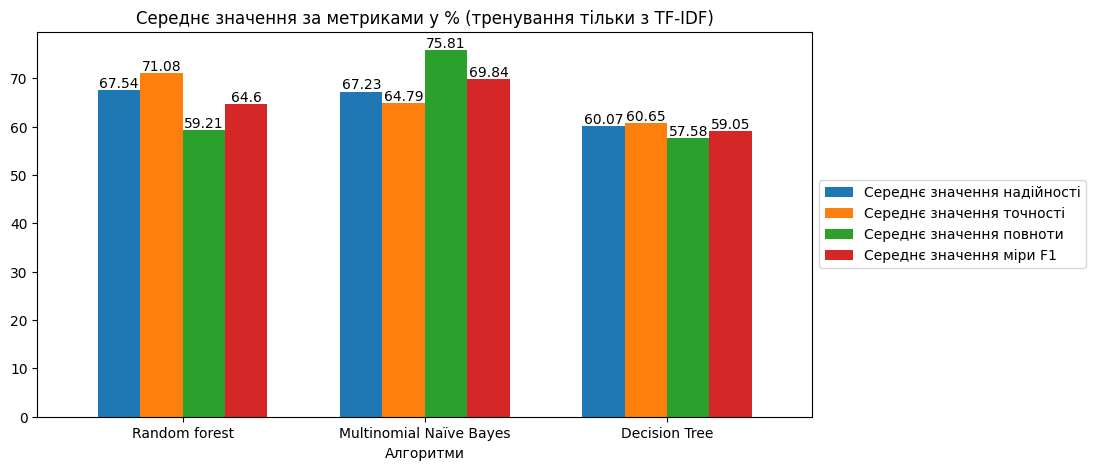

In [ ]:
ax = results_s.plot.bar(x='Алгоритми', width=0.7, figsize=(10, 5), title='Середнє значення за метриками у % (тренування тільки з TF-IDF)', rot=0)

for container in ax.containers:
    ax.bar_label(container)

ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

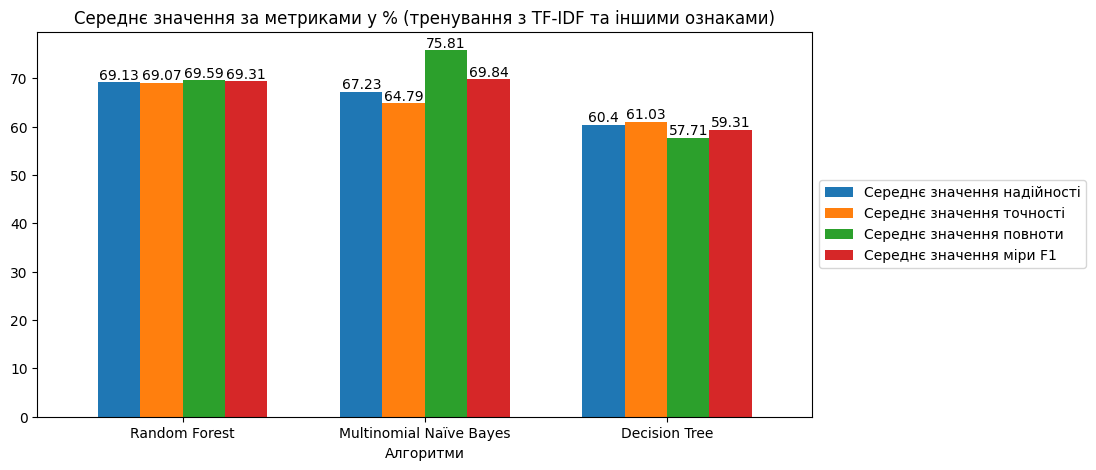

In [ ]:
ax = results_f.plot.bar(x='Алгоритми', width=0.7, figsize=(10, 5), title='Середнє значення за метриками у % (тренування з TF-IDF та іншими ознаками)', rot=0)

for container in ax.containers:
    ax.bar_label(container)

ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))